In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [2]:
filename=r'C:\Users\hp\Downloads\auto.csv'
df=pd.read_csv(filename,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

In [3]:
# replace "?" to NaN
df.replace("?", np.nan,inplace=True)

In [4]:
missing_data=df.isnull()
#True" stands for missing value, while "False" stands for not missing value.

In [5]:
missing_data.columns.values.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [6]:
missing_data['price'].value_counts()

False    201
True       4
Name: price, dtype: int64

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
cast_norm = df["normalized-losses"].astype("float")
avg_norm_loss=cast_norm.mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [9]:
df['normalized-losses'].replace(np.nan,avg_norm_loss,inplace=True)

In [10]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan,avg_bore,inplace=True)

In [11]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [12]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [13]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [16]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [17]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [18]:
#reset index,because we dropped two rows
df.reset_index(drop=True,inplace=True)

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [22]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [23]:
df['city-L/100km']=235/df['city-mpg']

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [25]:
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway-L/100km'},inplace=True)

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [27]:
df['length']=df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


# BINNING

In [29]:
df['horsepower']=df['horsepower'].astype('float')
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
group_name=['low','medium','high']
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_name,include_lowest=True)

In [30]:
df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

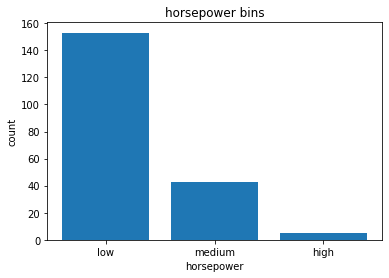

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_name, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

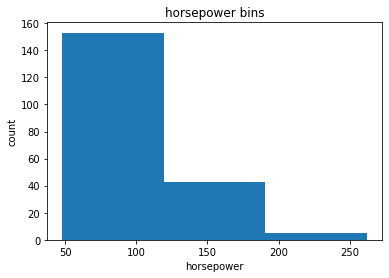

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [33]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
#dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
#dummy_variable_1.head()

In [37]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [38]:
df.drop('fuel-type',axis=1,inplace=True)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,low,0,1


In [40]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
df=pd.concat([df,dummy_variable_2],axis=1)

In [43]:
df.drop('aspiration',axis=1,inplace=True)

In [44]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,low,0,1,1,0


In [46]:
df.to_csv(r'C:\Users\hp\Downloads\cleanedDATA.csv')